In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [314]:
# Load the dataset
df = pd.read_csv('Automobile.csv')

In [315]:
# Basic statistical analysis
print("Dataset shape:", df.shape)

Dataset shape: (398, 9)


In [316]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [317]:
print("\nData types and missing values:")
df.info()


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [318]:
print("\nDescriptive Analysis:")
df.describe()


Descriptive Analysis:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000



Distribution Analysis


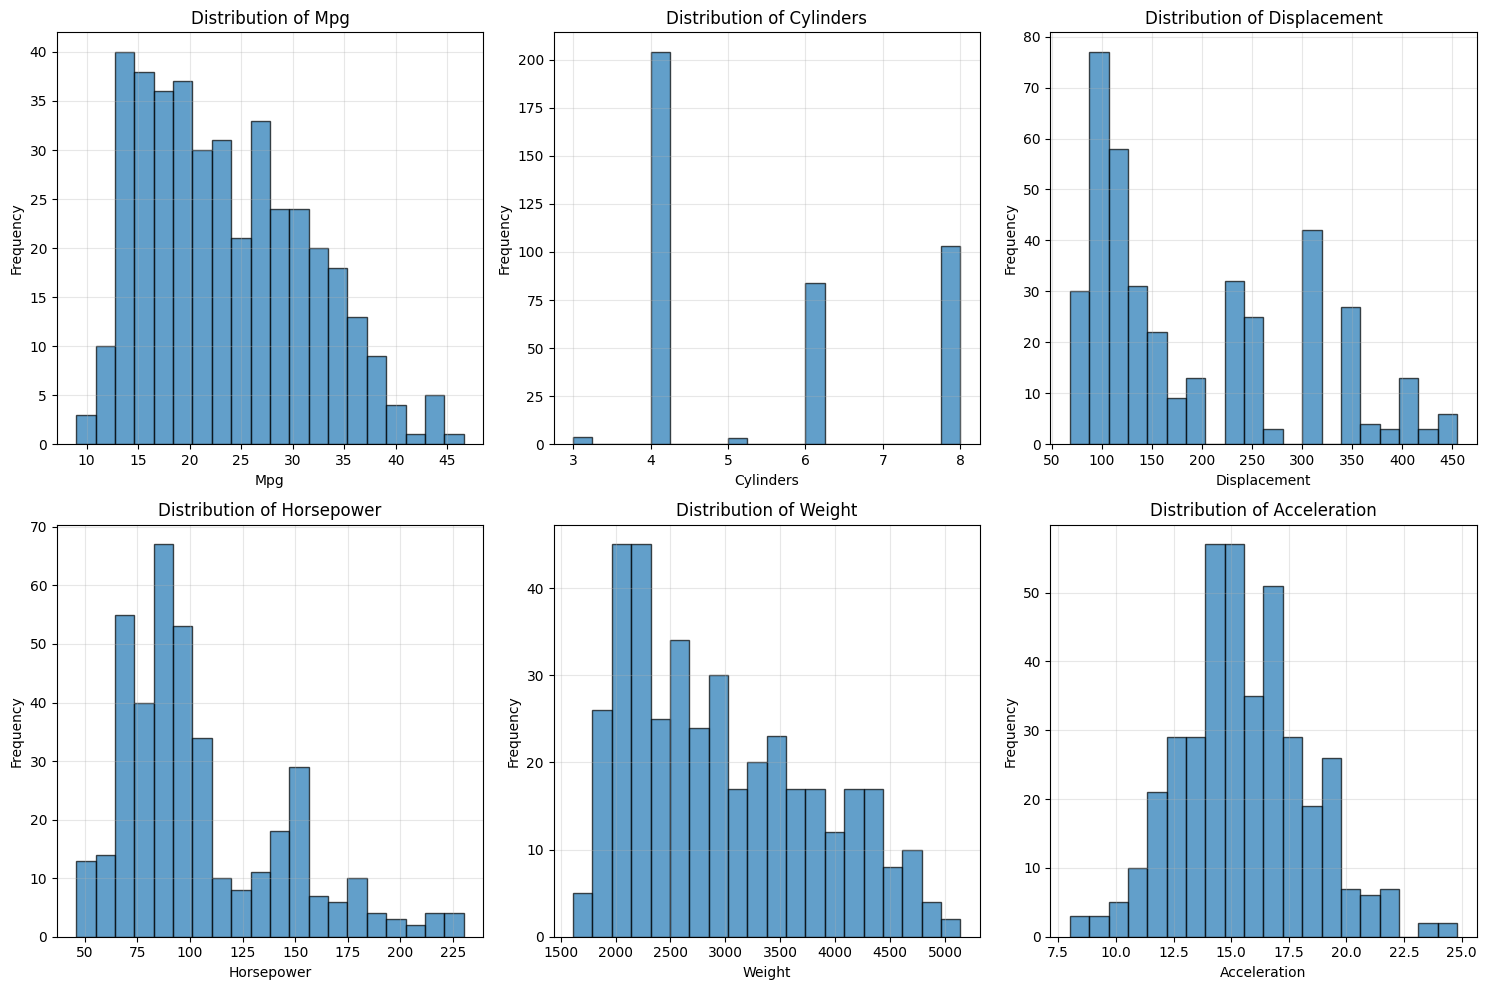

In [319]:
print("\nDistribution Analysis")
# Multiple histograms for all numeric variables
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [320]:
x = df['name'][0]
x[:x.index(" ")]

'chevrolet'

In [321]:
def company_name(x):
  if " " in x:
    return x[:x.index(" ")]
  else:
    return x

df["Company_name"] = df["name"].apply(company_name)
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Company_name
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,ford
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa,ford
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe,vw
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa,ford


In [322]:
def car_name(x):
  if " " in x:
    return x[x.index(" ")+1:]
  else:
    return x

df["car_name"] = df["name"].apply(car_name)
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Company_name,car_name
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,mustang gl
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe,vw,pickup
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,rampage
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa,ford,ranger


In [323]:
df = df.drop("name", axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Company_name,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford,ranger


In [324]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
Company_name    0
car_name        0
dtype: int64


In [325]:
df.duplicated().sum()

np.int64(0)

In [326]:
# Handle missing values
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [327]:
print(f"\nShape after handling missing values: {df.shape}")


Shape after handling missing values: (398, 10)


In [328]:
# Correlation analysis
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation matrix:")
corr_matrix


Correlation matrix:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


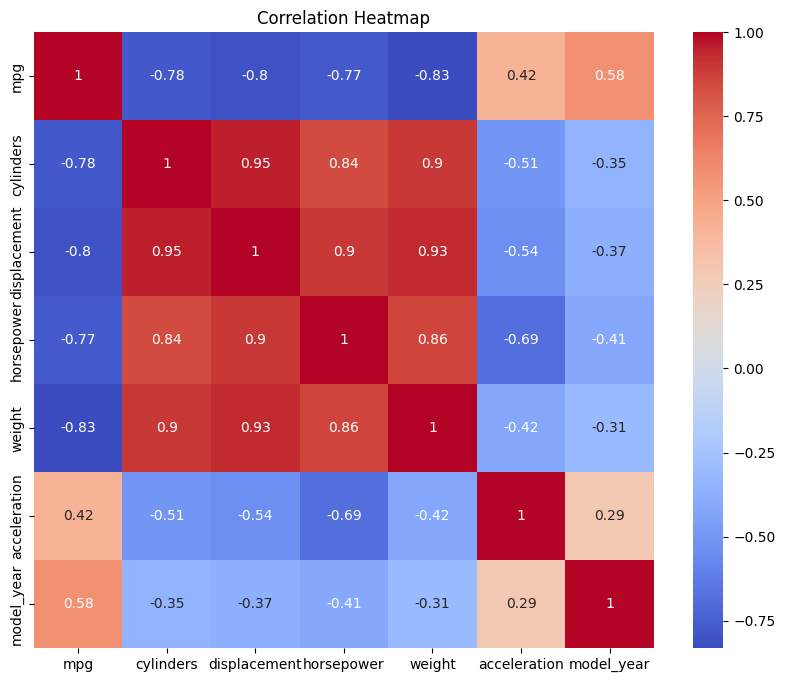

In [329]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [330]:
# Hypothesis testing: Do cars from different origins have different mpg?
usa_mpg = df[df['origin'] == 'usa']['mpg']
japan_mpg = df[df['origin'] == 'japan']['mpg']
europe_mpg = df[df['origin'] == 'europe']['mpg']

In [331]:
# ANOVA test
f_stat, p_value = stats.f_oneway(usa_mpg, japan_mpg, europe_mpg)
print(f"\nANOVA test for mpg across origins: F-statistic={f_stat:.2f}, p-value={p_value:.4f}")


ANOVA test for mpg across origins: F-statistic=98.54, p-value=0.0000


In [332]:
# Performing post-hoc tests
if p_value < 0.05:
    print("\nPost-hoc Tukey tests:")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog=df['mpg'], groups=df['origin'], alpha=0.05)
    print(tukey.summary())


Post-hoc Tukey tests:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
europe  japan   2.5592 0.0404   0.0877  5.0307   True
europe    usa  -7.8079    0.0  -9.8448  -5.771   True
 japan    usa -10.3671    0.0 -12.3114 -8.4228   True
-----------------------------------------------------


In [334]:
def winsorize_outliers(df, cols, limits=(0.05, 0.05)):
    df_winsorized = df.copy()

    print(f"Applying winsorization with limits: {limits}")

    for col in cols:
        # Store original values for comparison
        original_values = df_winsorized[col].copy()

        # Apply winsorization
        df_winsorized[col] = winsorize(original_values, limits=limits)

        # Count how many values were changed
        values_changed = (original_values != df_winsorized[col]).sum()

        # Show statistics
        print(f"\n{col}:")
        print(f"  Original range: [{original_values.min():.2f}, {original_values.max():.2f}]")
        print(f"  Winsorized range: [{df_winsorized[col].min():.2f}, {df_winsorized[col].max():.2f}]")
        print(f"  Values changed: {values_changed}")
        print(f"  Percentiles used: {original_values.quantile(limits[0]):.2f} to {original_values.quantile(1-limits[1]):.2f}")

    return df_winsorized

# Usage example
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Apply winsorization
df_cleaned = winsorize_outliers(df, numeric_cols, limits=(0.05, 0.05))

Applying winsorization with limits: (0.05, 0.05)

mpg:
  Original range: [9.00, 46.60]
  Winsorized range: [13.00, 37.20]
  Values changed: 32
  Percentiles used: 13.00 to 37.03

cylinders:
  Original range: [3.00, 8.00]
  Winsorized range: [4.00, 8.00]
  Values changed: 4
  Percentiles used: 4.00 to 8.00

displacement:
  Original range: [68.00, 455.00]
  Winsorized range: [85.00, 400.00]
  Values changed: 27
  Percentiles used: 85.00 to 400.00

horsepower:
  Original range: [46.00, 230.00]
  Winsorized range: [60.00, 180.00]
  Values changed: 32
  Percentiles used: 60.85 to 180.00

weight:
  Original range: [1613.00, 5140.00]
  Winsorized range: [1915.00, 4464.00]
  Values changed: 38
  Percentiles used: 1923.50 to 4464.00

acceleration:
  Original range: [8.00, 24.80]
  Winsorized range: [11.20, 20.50]
  Values changed: 36
  Percentiles used: 11.29 to 20.41


In [335]:
print(f"Before: {df.shape[0]} rows")
print(f"After: {df_cleaned.shape[0]} rows")

Before: 398 rows
After: 398 rows


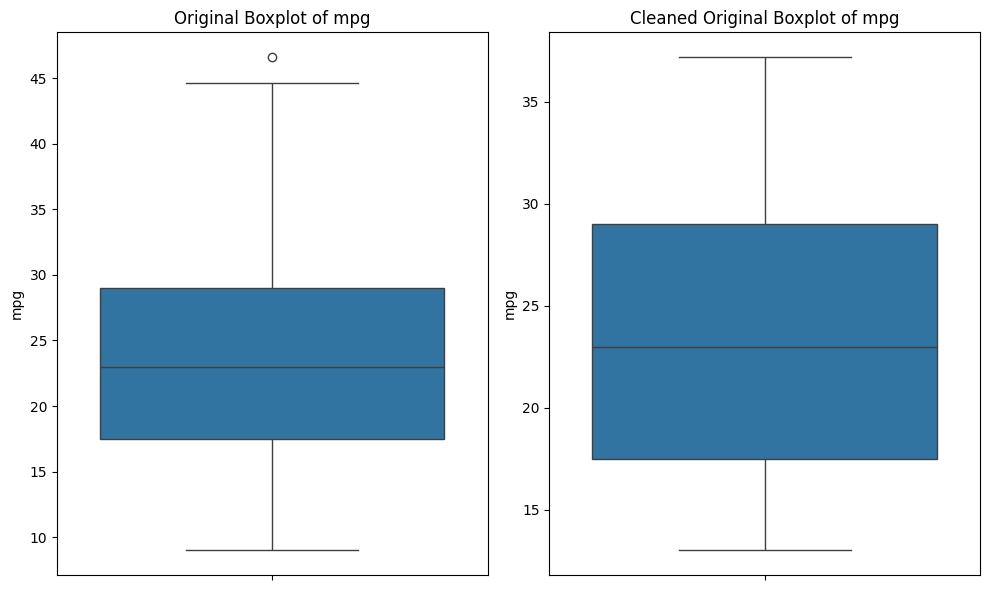

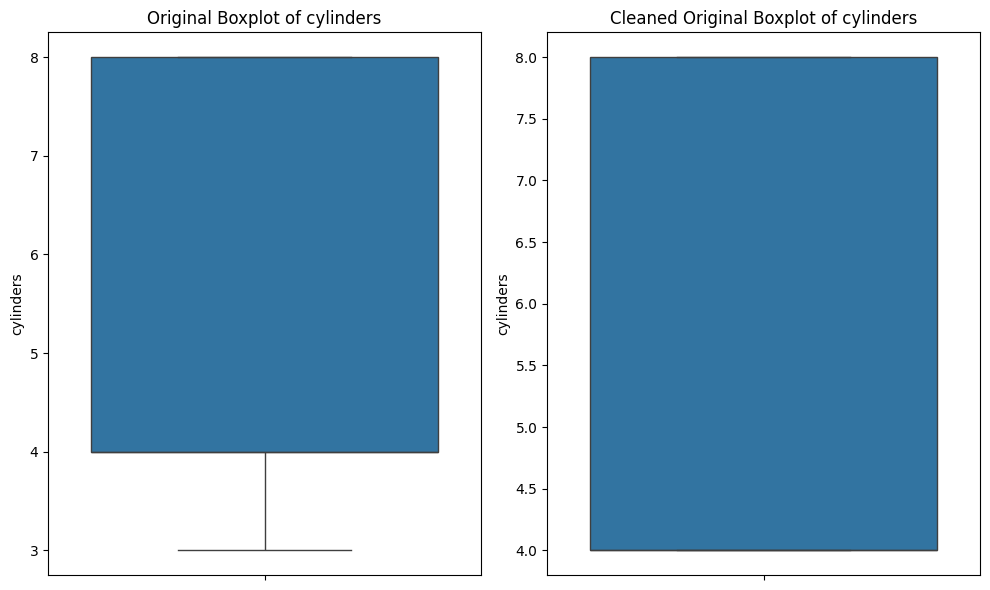

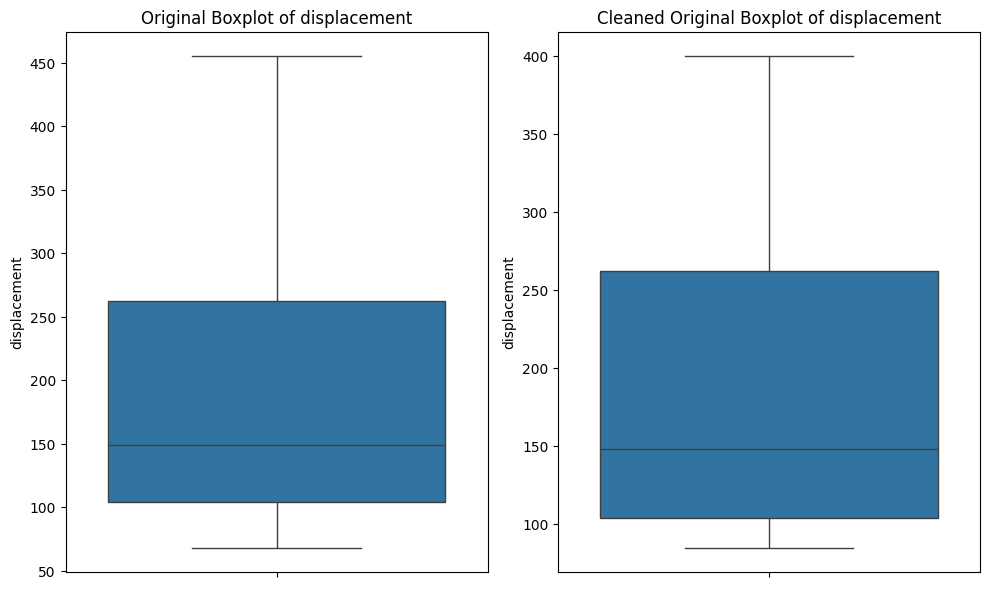

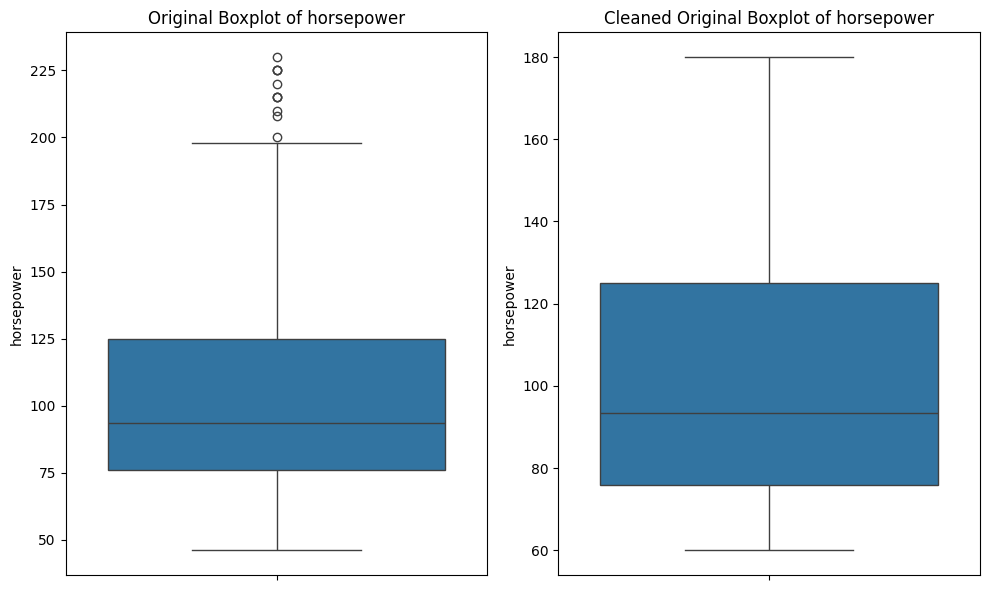

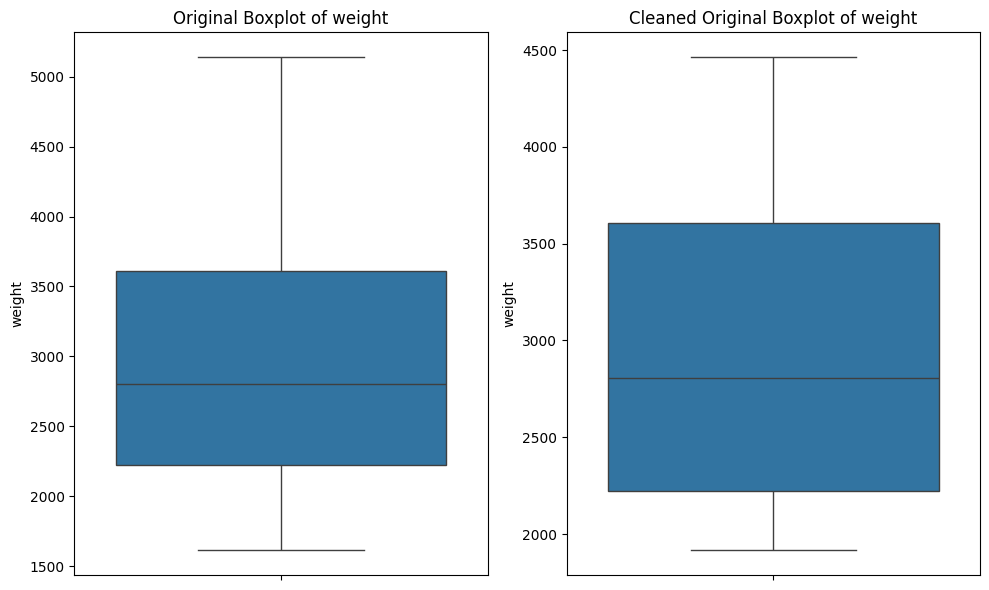

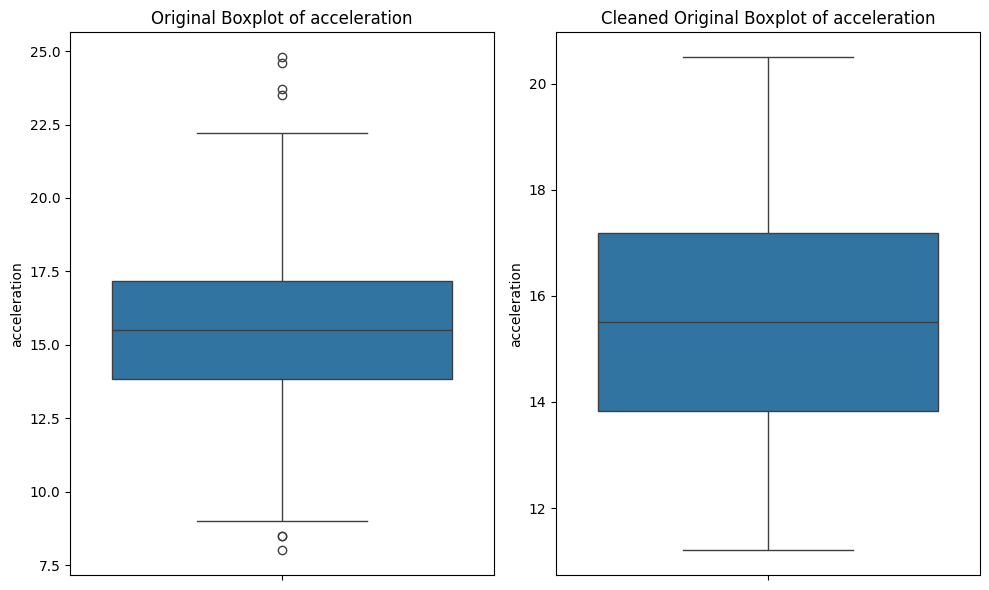

In [336]:
# First, identify the outliers that were removed
outliers_removed = df[~df.index.isin(df_cleaned.index)]

# Method 1: Side-by-side comparison
for col in df_cleaned.columns[:-4]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

    # Original data with outliers
    sns.boxplot(y=col, data=df, ax=ax1)
    ax1.set_title(f'Original Boxplot of {col}')

    # Cleaned data without outliers
    sns.boxplot(y=col, data=df_cleaned, ax=ax2)
    ax2.set_title(f'Cleaned Original Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [337]:
# Prepare data for mpg prediction
X = df_cleaned[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']].copy()
y = df_cleaned['mpg']

# Encode origin if needed
le = LabelEncoder()
X['origin'] = le.fit_transform(df_cleaned['origin'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=55)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
print("\nLinear Regression Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R²: {r2_score(y_test, y_pred_lr):.2f}")

print("\nRandom Forest Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R²: {r2_score(y_test, y_pred_rf):.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Linear Regression Performance:
MSE: 9.58
R²: 0.84

Random Forest Performance:
MSE: 5.60
R²: 0.91

Feature Importance:
        Feature  Importance
1  displacement    0.364912
3        weight    0.222373
5    model_year    0.131846
0     cylinders    0.130022
2    horsepower    0.122552
4  acceleration    0.022310
6        origin    0.005986


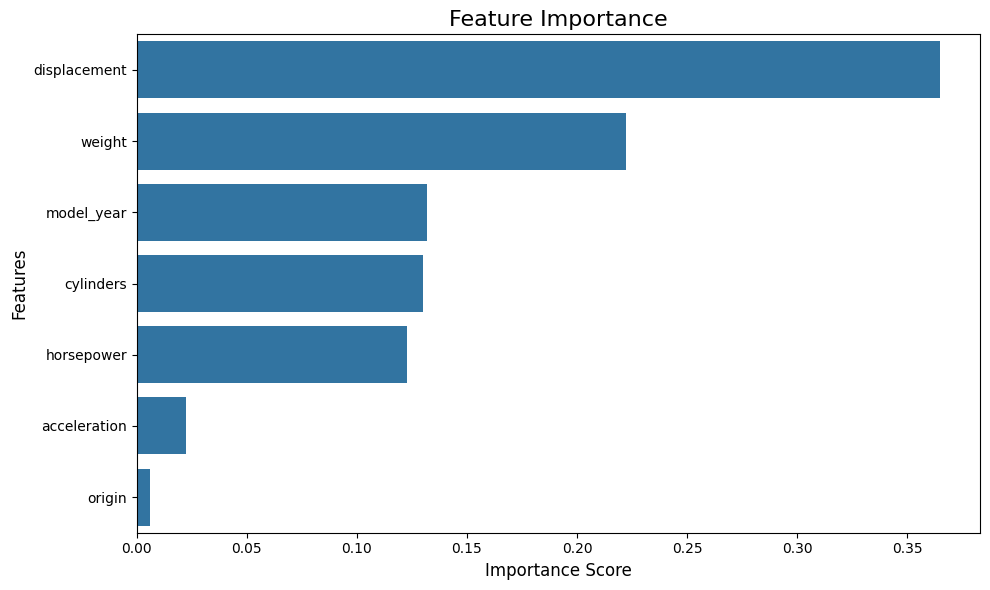

In [338]:
# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, legend=False)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

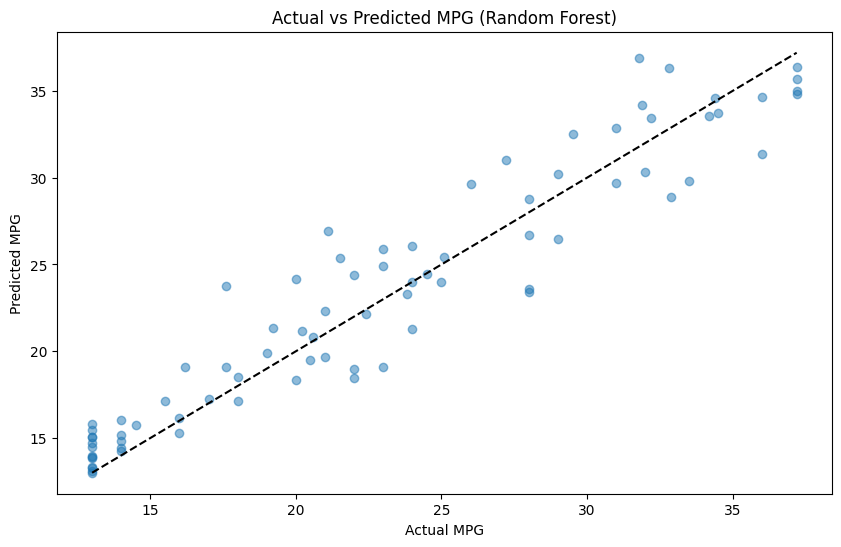

In [339]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG (Random Forest)')
plt.show()

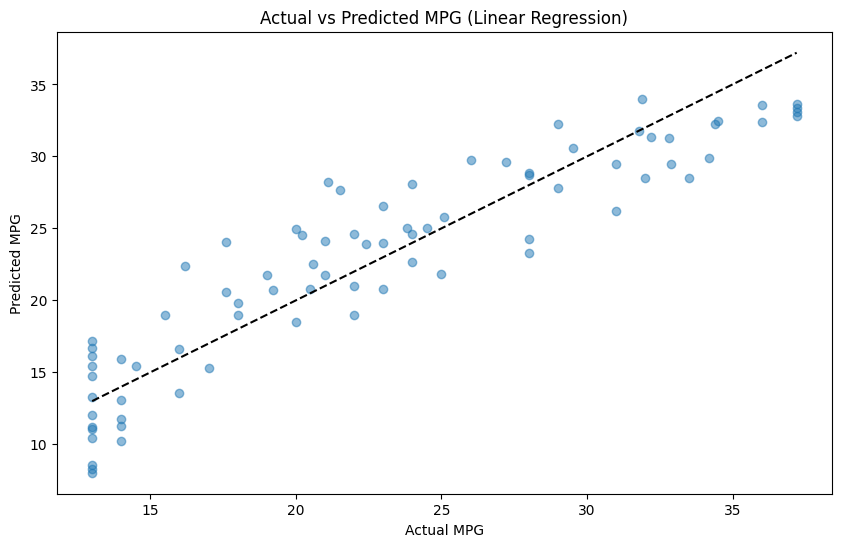

In [340]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG (Linear Regression)')
plt.show()

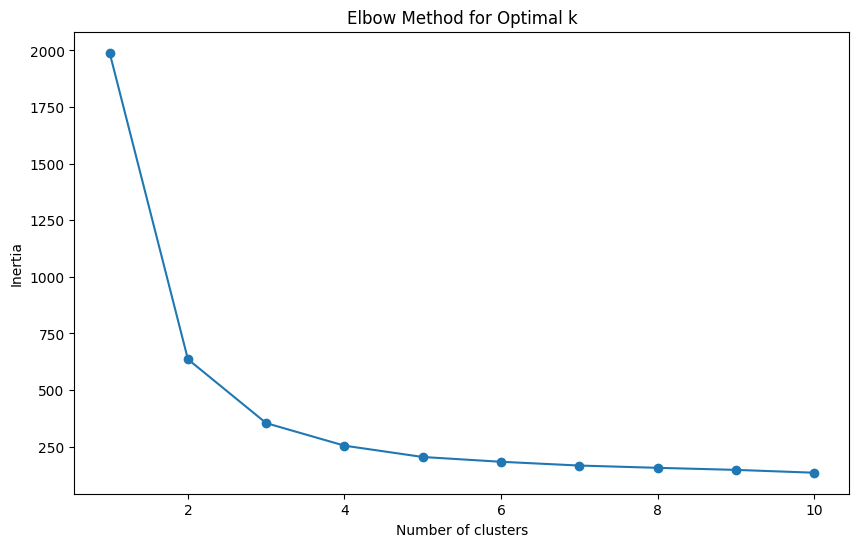

In [342]:
# Prepare data for clustering
cluster_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']
X_cluster = df[cluster_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=55)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [343]:
# Perform clustering with selected k
k = 3
kmeans = KMeans(n_clusters=k, random_state=55)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to dataframe
df['cluster'] = clusters

# Analyze clusters
print("\nCluster characteristics:")
print(df.groupby('cluster')[cluster_features].mean())


Cluster characteristics:
               mpg  cylinders  displacement  horsepower       weight
cluster                                                             
0        19.806522   5.978261    215.815217  101.809783  3204.217391
1        29.400000   4.004831    109.780193   78.533816  2306.067633
2        14.654545   8.000000    347.515152  160.505051  4142.272727


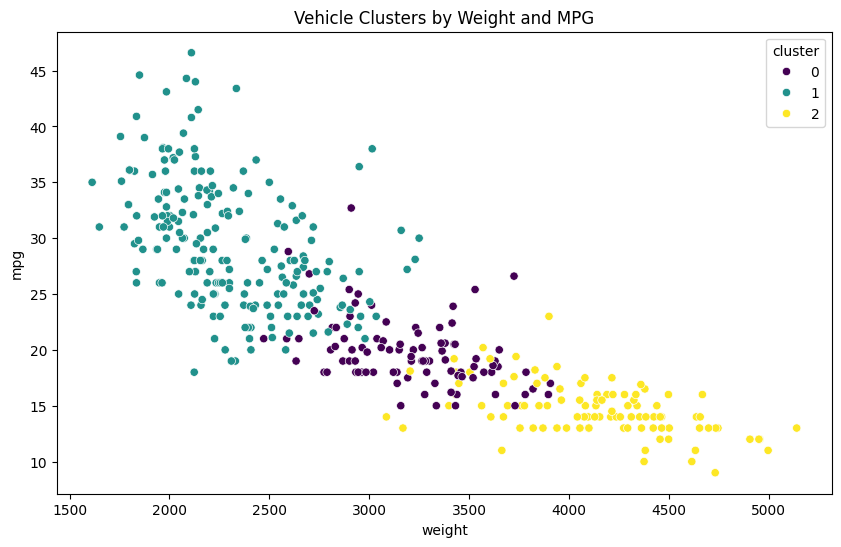

In [344]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', hue='cluster', data=df, palette='viridis')
plt.title('Vehicle Clusters by Weight and MPG')
plt.show()